# Project 1: Data Project
**Name:** Jana Ucnova (pvw581) // Spring Semester 2020

# Plastic Waste Generation

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import seaborn as sns
%matplotlib inline

## Read and clean data


### Per capita plastic waste vs GDP per capita
**Read data about per capita plastic waste and GDP per capita** in ``per-capita-plastic-waste-vs-gdp-per-capita.csv``. Data contains information about per capita plastic waste (kilograms per person per day), GDP per capita (in $) and the total population (gapminder) of different countries within several decades. We **clear the data** by choosing information only in the year 2010, by removing rows (countries) that do not contain all information and by renaming columns.

In [54]:
# Load data set
percapita_waste = pd.read_csv('per-capita-plastic-waste-vs-gdp-per-capita.csv')
# Choose only year 2010
percapita_waste_reduced = percapita_waste[percapita_waste['Year']==2010]
# Drop rows without any information
percapita_waste_reduced = percapita_waste_reduced.dropna()
# Rename columns
percapita_waste_reduced = percapita_waste_reduced.rename(columns={'Entity':'Country','Per capita plastic waste (kilograms per person per day)': 'PerCapWaste', 'GDP per capita, PPP (constant 2011 international $) (constant 2011 international $)': 'PerCapGDP', 'Total population (Gapminder)': 'TotalPop'})

The dataset now looks like this:

In [55]:
percapita_waste_reduced.head()

,Country,Code,Year,PerCapWaste,PerCapGDP,TotalPop
171,Albania,ALB,2010,0.069,9927.181841,3204284.0
244,Algeria,DZA,2010,0.144,12870.602699,35468208.0
453,Angola,AGO,2010,0.062,5897.682841,19081912.0
597,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88710.0
748,Argentina,ARG,2010,0.183,18712.063077,40412376.0


### Coastal population vs mismanaged plastic
**Read data about coastal population and mismanaged plastic** in ``coastal-population-vs-mismanaged-plastic.csv``. Data contains information about mismanaged plastic waste (in tonnes), coastal population and the total population of different countries within several decades. We **clear the data**.

In [56]:
# Load data
coastal_pop = pd.read_csv('coastal-population-vs-mismanaged-plastic.csv')
# Choose only year 2010
coastal_pop_reduced = coastal_pop[coastal_pop['Year']==str(2010)]
# Drop rows without any information
coastal_pop_reduced = coastal_pop_reduced.dropna()
# Choose only columns with code and new information that is not included in the first dataset 
coastal_pop_reduced = coastal_pop_reduced[['Code','Mismanaged plastic waste (tonnes)','Coastal population']]
# Rename columns
coastal_pop_reduced = coastal_pop_reduced.rename(columns={'Mismanaged plastic waste (tonnes)':'MisWaste','Coastal population':'CoastPop'})

The dataset now looks like this:

In [57]:
coastal_pop_reduced.head()

,Code,MisWaste,CoastPop
552,ALB,29705.0,2530533.0
772,DZA,520555.0,16556580.0
1282,AGO,62528.0,3790041.0
1352,AIA,52.0,14561.0
1572,ATG,1253.0,66843.0


### Total plastic waste generation
**Read data about total plastic waste generation** in ``plastic-waste-generation-total.csv``. Data contains information about total waste generation (in tonnes per year) of different countries in 2010. We **clear the data**.

In [58]:
# Load dataset
total_waste = pd.read_csv('plastic-waste-generation-total.csv')
# Choose only columns with code and new information that is not included in the first dataset 
total_waste_reduced = total_waste[['Code','Plastic waste generation (tonnes, total) (tonnes per year)']]
# Rename column
total_waste_reduced = total_waste_reduced.rename(columns={'Plastic waste generation (tonnes, total) (tonnes per year)':'PlasticWasteGen'})

The dataset now looks like this:

In [59]:
total_waste_reduced.head()

,Code,PlasticWasteGen
0,ALB,73364
1,DZA,1898343
2,AGO,528843
3,ATG,22804
4,ARG,2753550


### Plastic waste littered
**Read data about plastic waste littered** in ``plastic-waste-littered.csv``. Data contains information about plastic waste littered (in tonnes per year) in different countries in 2010. We **clear the data**.

In [60]:
# Load dataset
plastic_littered = pd.read_csv('plastic-waste-littered.csv')
# Choose only columns with code and new information that is not included in the first dataset 
plastic_littered_reduced = plastic_littered[['Code','Plastic waste littered (tonnes per year)']]
# Rename column
plastic_littered_reduced = plastic_littered_reduced.rename(columns={'Plastic waste littered (tonnes per year)':'PlasticWasteLitter'})

The dataset now looks like this:

In [61]:
plastic_littered_reduced.head()

,Code,PlasticWasteLitter
0,ALB,1273.120
1,DZA,17331.660
2,AGO,1719.880
3,AIA,26.645
4,ATG,320.835


### Inadequately managed plastic
**Read data about inadequately managed plastic** in ``inadequately-managed-plastic.csv``. Data contains information about the share of plastic inadequately managed in different countries in 2010. We **clear the data**.

In [62]:
# Load dataset
managed_plastic = pd.read_csv('inadequately-managed-plastic.csv')
# Choose only columns with code and new information that is not included in the first dataset 
managed_plastic_reduced = managed_plastic[['Code','Share of plastic inadequately managed (%)']]
# Rename column
managed_plastic_reduced = managed_plastic_reduced.rename(columns={'Share of plastic inadequately managed (%)':'InadequatelyManPlastic'})

The dataset now looks like this:

In [63]:
managed_plastic_reduced.head()

,Code,InadequatelyManPlastic
0,ALB,45
1,DZA,58
2,AGO,71
3,AIA,2
4,ATG,6


### Countries and continents codes
**Read data about countries and continents codes** in ``country-and-continent-codes-list.csv``. Data contains the list of countries with the code and the continets where given country lies in. We **clear the data**.


In [64]:
# Load dataset
continent_list = pd.read_csv('country-and-continent-codes-list.csv')
# Choosing only code of the country and continent
continent_list = continent_list[['Three_Letter_Country_Code','Continent_Name']]

The dataset now looks like this:

In [65]:
continent_list.head()

,Three_Letter_Country_Code,Continent_Name
0,AFG,Asia
1,ALB,Europe
2,ATA,Antarctica
3,DZA,Africa
4,ASM,Oceania


Now, we merge all these datasets together by country codes.

In [66]:
plastic1 = pd.merge(percapita_waste_reduced, coastal_pop_reduced, left_on='Code', right_on='Code')
plastic2 = pd.merge(plastic1,total_waste_reduced, left_on='Code', right_on='Code')
plastic3 = pd.merge(plastic2,plastic_littered_reduced, left_on='Code', right_on='Code')
plastic4 = pd.merge(plastic3,managed_plastic_reduced, left_on='Code', right_on='Code')

# We obtain the final dataset
plastic = pd.merge(plastic4, continent_list, left_on='Code', right_on='Three_Letter_Country_Code')
# Drop one column with country code
plastic = plastic.drop(columns=['Three_Letter_Country_Code'])
# Rename the column
plastic = plastic.rename(columns={'Continent_Name': 'Continent'})

Final data set now looks like this:

In [67]:
plastic.head()

,Country,Code,Year,PerCapWaste,PerCapGDP,TotalPop,MisWaste,CoastPop,PlasticWasteGen,PlasticWasteLitter,InadequatelyManPlastic,Continent
0,Albania,ALB,2010,0.069,9927.181841,3204284.0,29705.0,2530533.0,73364,1273.120,45,Europe
1,Algeria,DZA,2010,0.144,12870.602699,35468208.0,520555.0,16556580.0,1898343,17331.660,58,Africa
2,Angola,AGO,2010,0.062,5897.682841,19081912.0,62528.0,3790041.0,528843,1719.880,71,Africa
3,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88710.0,1253.0,66843.0,22804,320.835,6,North America
4,Argentina,ARG,2010,0.183,18712.063077,40412376.0,157777.0,16449245.0,2753550,21901.460,12,South America


,Continent
0,Europe
1,Africa
2,Africa
3,North America
4,South America
...,...
144,North America
145,South America
146,Oceania
147,South America


In [180]:
col = dict({'Africa':'orange',
            'Asia':'brown',
            'Europe': 'blue',
           'Oceania': 'magenta',
            'North America': 'green',
            'South America': 'red'})

plastic["Color"] = plastic["Continent"].apply(lambda x: col.get(x))
pop = np.array(plastic['TotalPop'])/1000000

In [185]:
class Cursor:
    def __init__(self, ax):
        self.ax = ax
        self.lx = ax.axhline(color='k')  # the horiz line
        self.ly = ax.axvline(color='k')  # the vert line

        # text location in axes coords
        self.txt = ax.text(0.7, 0.9, '', transform=ax.transAxes)

    def mouse_move(self, event):
        if not event.inaxes:
            return

        x, y = event.xdata, event.ydata
        # update the line positions
        self.lx.set_ydata(y)
        self.ly.set_xdata(x)

        self.txt.set_text('x=%1.2f, y=%1.2f' % (x, y))
        self.ax.figure.canvas.draw()


class SnaptoCursor:
    """
    Like Cursor but the crosshair snaps to the nearest x, y point.
    For simplicity, this assumes that *x* is sorted.
    """

    def __init__(self, ax, x, y):
        self.ax = ax
        self.lx = ax.axhline(color='k')  # the horiz line
        self.ly = ax.axvline(color='k')  # the vert line
        self.x = x
        self.y = y
        # text location in axes coords
        self.txt = ax.text(0.7, 0.9, '', transform=ax.transAxes)

    def mouse_move(self, event):
        if not event.inaxes:
            return

        x, y = event.xdata, event.ydata
        indx = min(np.searchsorted(self.x, x), len(self.x) - 1)
        x = self.x[indx]
        y = self.y[indx]
        # update the line positions
        self.lx.set_ydata(y)
        self.ly.set_xdata(x)

        self.txt.set_text('x=%1.2f, y=%1.2f' % (x, y))
        print('x=%1.2f, y=%1.2f' % (x, y))
        self.ax.figure.canvas.draw()

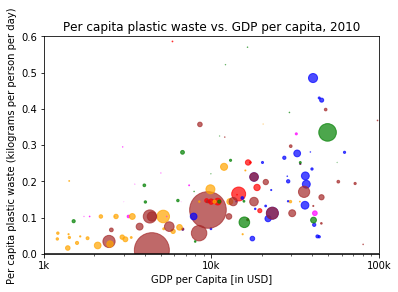

In [189]:
fig, ax = plt.subplots()
ax.scatter(x='PerCapGDP', y='PerCapWaste',c='Color',s=pop,data=plastic, alpha=0.7)
cursor = Cursor(ax)
fig.canvas.mpl_connect('motion_notify_event', cursor.mouse_move)
plt.xlim(1000,100000)
plt.ylim(0,0.6)
plt.xscale('log')
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Per capita plastic waste (kilograms per person per day)')
plt.title('Per capita plastic waste vs. GDP per capita, 2010')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])

plt.show()
